# Feature Engineering
## 1. Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report




## 2. Dataset load

In [3]:
# Add the dataset the sample_data folder (on the left side)

# Load the dataset
data = pd.read_csv('/content/sample_data/P5_dataset_cast.csv', sep=';') # Check the separator
#data = pd.read_csv('P5_dataset_cast.csv', sep=';') # Check the separator
# Inspect the first few rows
print(data.head())

             name                               classes  level       category  \
0     Acid Splash           Artificer, Sorcerer, Wizard      0    Conjuration   
1      Blade Ward       Bard, Sorcerer, Warlock, Wizard      0     Abjuration   
2   Booming Blade  Artificer, Sorcerer, Warlock, Wizard      0      Evocation   
3     Chill Touch             Sorcerer, Warlock, Wizard      0     Necromancy   
4  Control Flames               Druid, Sorcerer, Wizard      0  Transmutation   

  cast_time                 range                 duration  verbal  somatic  \
0  1 Action               60 Feet            Instantaneous       1        1   
1  1 Action                  Self                  1 round       1        1   
2  1 Action  Self (5-foot radius)                  1 round       0        1   
3  1 Action              120 Feet                  1 round       1        1   
4  1 Action               60 Feet  Instantaneous or 1 hour       0        1   

   material                           

## 3. Pre-processing

['you hurl a bubbl of acid. choos one creatur within range, or choos two creatur within rang that are within 5 feet of each other. a target must succeed on a dexter save throw or take 1d6 acid damage. at higher levels. thi spell’ damag increas by 1d6 when you reach 5th level (2d6), 11th level (3d6), and 17th level (4d6).', 'you extend your hand and trace a sigil of ward in the air. until the end of your next turn, you have resist against bludgeoning, piercing, and slash damag dealt by weapon attacks.', 'you brandish the weapon use in the spell’ cast and make a mele attack with it against one creatur within 5 feet of you. on a hit, the target suffer the weapon attack’ normal effect and then becom sheath in boom energi until the start of your next turn. if the target willingli move 5 feet or more befor then, the target take 1d8 thunder damage, and the spell ends. at higher levels. at 5th level, the mele attack deal an extra 1d8 thunder damag to the target on a hit, and the damag the targ

<Axes: xlabel='category'>

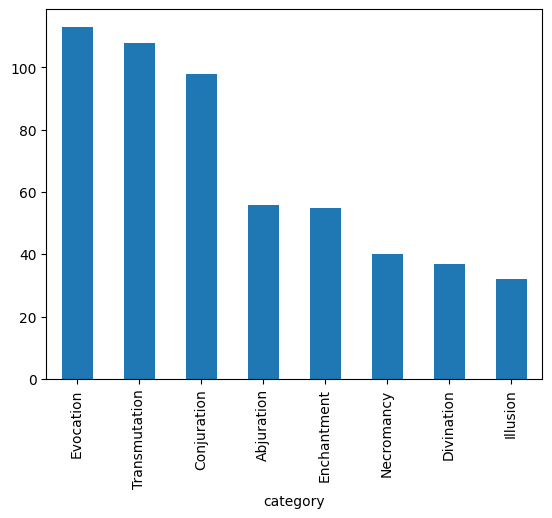

In [5]:
# Pre-processing elements
porter_stemmer=PorterStemmer()
def processSentence(s):
    words=re.split("\\s+",s)
    stemmed_words=[porter_stemmer.stem(word=w) for w in words]
    return ' '.join(stemmed_words)

# Pre-processing dataset
X_inicial = data['text']  # Check if the appropriate collumn name is 'text'
X_process = [processSentence(s) for s in X_inicial]
print(X_process[:10])

y = data['category']      # Check if the appropriate collumn name is 'category'
labels = np.unique(y).tolist()
print("y: ", y[:15])

# Note: If you decide to encode the category labels to integers
# label_encoder = LabelEncoder()
#  y = label_encoder.fit_transform(data['category'])

# To check how balanced is the dataset (oops)
y.value_counts().plot(kind = 'bar')


## 4. Create vectors

In [6]:
# Initialize the vectorizer stuff (possibel to use max_features=num_features)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=["the","is","and"], min_df = 2)
count_vectorizer = CountVectorizer(ngram_range=(1,3), stop_words=["the","is","and"], min_df = 2)

# Fit and transform the text data in two flavours
X = tfidf_vectorizer.fit_transform(X_process).toarray()
Z = count_vectorizer.fit_transform(X_process).toarray()


## Train/test split

In [7]:
# Train/test split
indices = range(len(data))
train_indices, test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=42) # find why 42

X_train, X_test = X[train_indices], X[test_indices]
Z_train, Z_test = Z[train_indices], Z[test_indices]



## Train with classic classifiers

In [8]:
print("==== SVM ====")
clf = svm.SVC(kernel='linear') # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

print("Resultados com tfidf")
clf.fit(X_train, y_train)
x_pred=clf.predict(X_test)
print(classification_report(y_pred=x_pred, y_true=y_test, labels = labels, zero_division=1.))

print("Resultados com count")
clf.fit(Z_train, y_train)
z_pred=clf.predict(Z_test)
print(classification_report(y_pred=z_pred, y_true=y_test, labels = labels, zero_division=1.))

print("==== MultinomialNB ====")
clf = MultinomialNB()

print("Resultados com tfidf")
clf.fit(X_train, y_train)
x_pred=clf.predict(X_test)
print(classification_report(y_pred=x_pred, y_true=y_test, labels = labels, zero_division=1.))

print("Resultados com count")
clf.fit(Z_train, y_train)
z_pred=clf.predict(Z_test)
print(classification_report(y_pred=z_pred, y_true=y_test, labels = labels, zero_division=1.))

print("==== GaussianNB ====")
clf = GaussianNB()

print("Resultados com tfidf")
clf.fit(X_train, y_train)
x_pred=clf.predict(X_test)
print(classification_report(y_pred=x_pred, y_true=y_test, labels = labels, zero_division=1.))

print("Resultados com count")
clf.fit(Z_train, y_train)
z_pred=clf.predict(Z_test)
print(classification_report(y_pred=z_pred, y_true=y_test, labels = labels, zero_division=1.))

==== SVM ====
Resultados com tfidf
               precision    recall  f1-score   support

   Abjuration       0.33      0.27      0.30        11
  Conjuration       0.47      0.56      0.51        16
   Divination       1.00      0.27      0.43        11
  Enchantment       0.50      0.50      0.50         4
    Evocation       0.51      0.79      0.62        24
     Illusion       1.00      0.43      0.60         7
   Necromancy       1.00      0.00      0.00        11
Transmutation       0.42      0.58      0.49        24

     accuracy                           0.49       108
    macro avg       0.66      0.43      0.43       108
 weighted avg       0.60      0.49      0.46       108

Resultados com count
               precision    recall  f1-score   support

   Abjuration       0.42      0.73      0.53        11
  Conjuration       0.52      0.69      0.59        16
   Divination       0.50      0.36      0.42        11
  Enchantment       0.33      0.50      0.40         4
    E

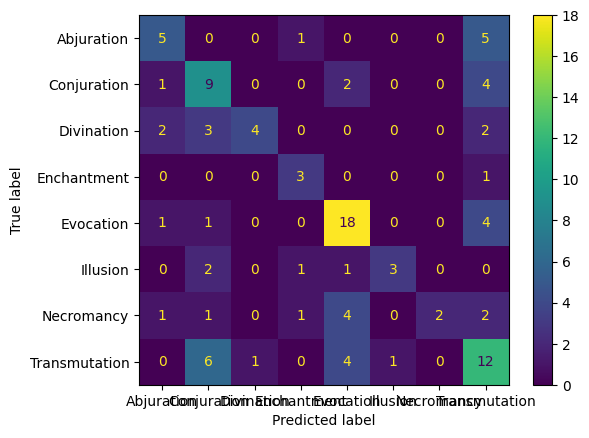

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, z_pred)

cm = confusion_matrix(y_test, z_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()